## Lab - 6

Name: Purusharth Malik

Registration No.: 2348542

### Implement quantum gates  using superdense coding
- Use  an additional qubit as a random bit generator to randomly choose c and d, then run the superdense coding protocol to see that these bits are transmitted correctly.

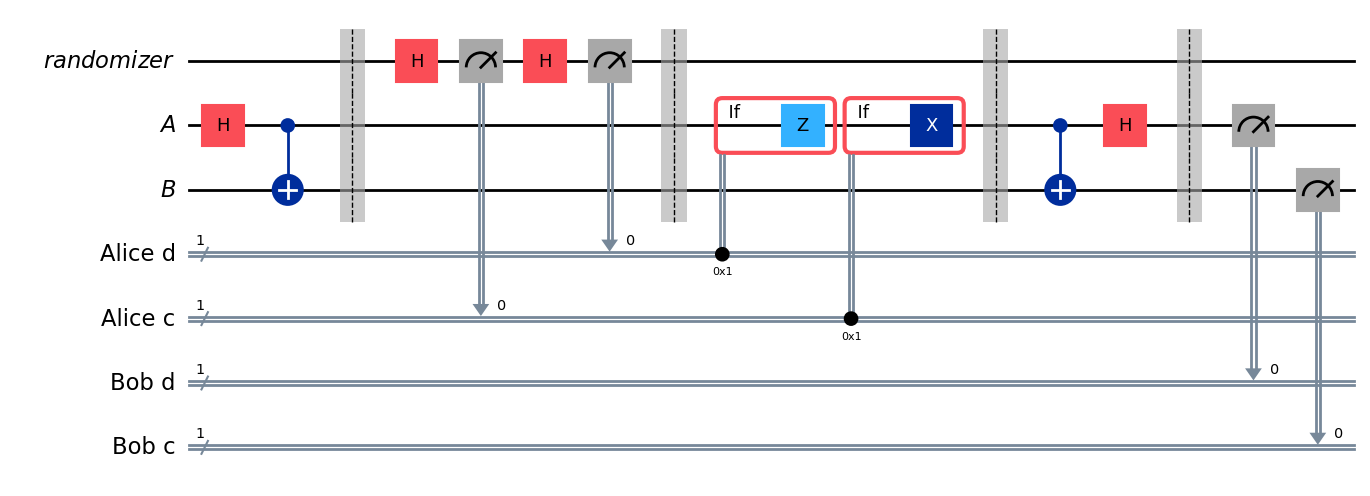

In [22]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, circuit_drawer
from qiskit import QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

rbg = QuantumRegister(1, "randomizer") 
ebit0 = QuantumRegister(1, "A")         
ebit1 = QuantumRegister(1, "B")         
Alice_c = ClassicalRegister(1, "Alice c")
Alice_d = ClassicalRegister(1, "Alice d")
test = QuantumCircuit(rbg, ebit0, ebit1, Alice_d, Alice_c)
# Initialize the EPR pair
test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()
# Generate Alice's bit c
test.h(rbg)
test.measure(rbg, Alice_c)
# Generate Alice's bit d
test.h(rbg)
test.measure(rbg, Alice_d)
test.barrier()
# Alice's Actions
with test.if_test((Alice_d, 1), label='Z'):
    test.z(ebit0)
with test.if_test((Alice_c, 1), label='X'):
    test.x(ebit0)
test.barrier()
# Bob's Actions
test.cx(ebit0, ebit1)
test.h(ebit0)
test.barrier()
Bob_c = ClassicalRegister(1, "Bob c")
Bob_d = ClassicalRegister(1, "Bob d")
test.add_register(Bob_d)
test.add_register(Bob_c)
# Bob measures his qubits
test.measure(ebit0, Bob_d)
test.measure(ebit1, Bob_c)
display(test.draw(output='mpl'))

### Running the  simulator shows that Alice and Bob's classical bits always agree

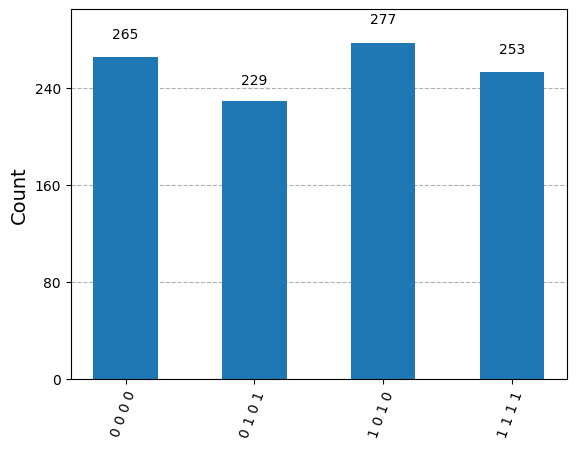

In [23]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()

display(plot_histogram(statistics))
# Extracting and printing the measurement results
for outcome, count in statistics.items():
    # Reversing the outcome string to match the register order
    bits = outcome[::-1]
    # Mapping bits to their corresponding registers
    Alice_c_bit = bits[test.clbits.index(Alice_c[0])]
    Alice_d_bit = bits[test.clbits.index(Alice_d[0])]
    Bob_c_bit = bits[test.clbits.index(Bob_c[0])]
    Bob_d_bit = bits[test.clbits.index(Bob_d[0])]

# End